## Gather 
#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Merge the 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./datasets/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# get all files names and assign them to a list
files = [file for file in os.listdir("./datasets")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
# use concat() to merge all months data into one DataFrame
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./datasets/{}".format(file))
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

In [5]:
# test
counts = 0
for file in files:
    df = pd.read_csv("./datasets/{}".format(file))
    counts += df.shape[0]
    
if counts == all_months_data.shape[0]:
    print('True')

True


In [6]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop the empty rows

In [7]:
# drop whole rows which all columns are NaN
all_months_data.dropna(how='all', inplace=True)

#### Save it as a new file

In [8]:
all_months_data.to_csv("./datasets/all_data.csv", index=False)

In [9]:
all_data = pd.read_csv("./datasets/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Remove this file

In [10]:
os.remove("./datasets/all_data.csv")

## Assess

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


#### Note: 
- Wrong data type of Quantity Ordered and Price Each column.


## Clean

In [12]:
df = all_data.copy()

#### Add Month colum

In [13]:
df['Month'] = df['Order Date'].str[0:2]
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [14]:
df['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

As we can see above, we cannot convert the Month's type from str to int because of 'Or'. And because we do not have any precise values for substituting those 'Or' values, we simply delete those whole rows with the 'Or' value.

In [15]:
# remove rows with 'Or' in Month column
df = df[df['Month'] != 'Or']

In [16]:
# convert str to int
df['Month'] = df['Month'].astype('int32')
# test
df['Month'].value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

#### Fix the wrong data type

In [17]:
# use pd.to_numeric to get the proper data type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [18]:
# test
print(df[['Quantity Ordered', 'Price Each']].dtypes)

Quantity Ordered      int64
Price Each          float64
dtype: object


#### Add a Sales column

In [19]:
# sales = quantity * price
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a City column

In [20]:
# Let's use apply()
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' (' + x.split(',')[2][1:3] + ')')
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Add a Hour and a Minute column

In [21]:
# convert Order Date column from str to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# test
print(df['Order Date'].dtype)

datetime64[ns]


In [22]:
# create a new column
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
# test
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


## Analyze & Visualize
### Question 1: What was the best month for sales? How much was earned that month?

In [23]:
df.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1.811768e+06,1.822257e+06,139485,282440
2,13449,2.188885e+06,2.202022e+06,172669,354885
3,17005,2.791208e+06,2.807100e+06,218969,447559
4,20558,3.367671e+06,3.390670e+06,262259,544186
5,18667,3.135125e+06,3.152607e+06,238780,487899
6,15253,2.562026e+06,2.577802e+06,195528,402436
7,16072,2.632540e+06,2.647776e+06,206169,417349
8,13448,2.230345e+06,2.244468e+06,172289,353857
9,13109,2.084992e+06,2.097560e+06,168513,341698


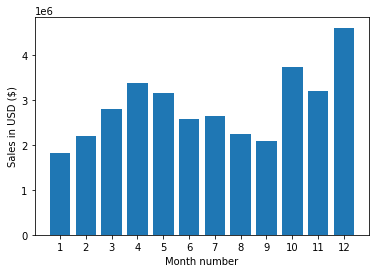

In [24]:
# visualize Sales column
months = range(1,13)
sales_usd = df.groupby(['Month']).sum()['Sales']

plt.bar(months, sales_usd)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show();

#### Answer:
We can clearly see that December was the best month for sales in 2019 which was around 4615000 USD.

### Question 2: What city had the highest number of sales?

In [25]:
df.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


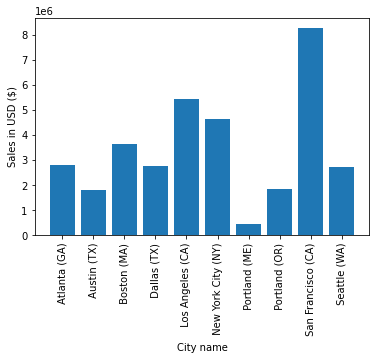

In [26]:
# visualization

sales_city = df.groupby('City').sum()['Sales']
cities = sales_city.index

plt.bar(cities, sales_city)
plt.xticks(cities, rotation=90)
plt.xlabel('City name')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Answer: 
We can easily draw a conclusion that San Francisco (CA) was the city which had the highest sales in 2019.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [27]:
df.groupby('Hour').sum()

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


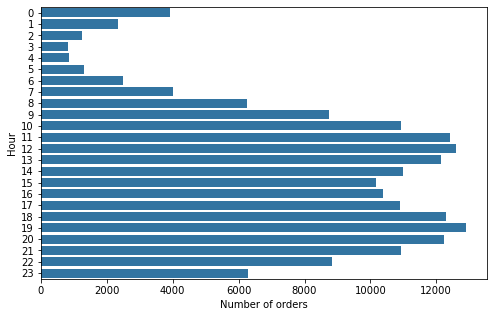

In [28]:
base_color = sns.color_palette()[0]

plt.figure(figsize=[8,5])
sns.countplot(data = df, y='Hour', color = base_color);
plt.xlabel('Number of orders')
plt.ylabel('Hour')
plt.show()

#### Answer:
My recommendation is around 11am (11) or 7pm (19)

### Question 4: What products are most often sold together?

In [35]:
df_products = df[df['Order ID'].duplicated(keep=False)]

df_products['Grouped'] = df_products.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df_products = df_products[['Order ID', 'Grouped']].drop_duplicates()
# test
df_products.head(10)

<ipython-input-35-cec963b12628>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Grouped'] = df_products.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"
128,176681,"Apple Airpods Headphones, ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
188,176739,"34in Ultrawide Monitor, Google Phone"
224,176774,"Lightning Charging Cable, USB-C Charging Cable"
232,176781,"iPhone, Lightning Charging Cable"


In [42]:
df_products['Grouped'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Grouped, dtype: int64

#### Answer: 
Those products in the above list were often sold together.

### Question 5: What product sold the most? Why do you think it sold the most?

In [48]:
df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

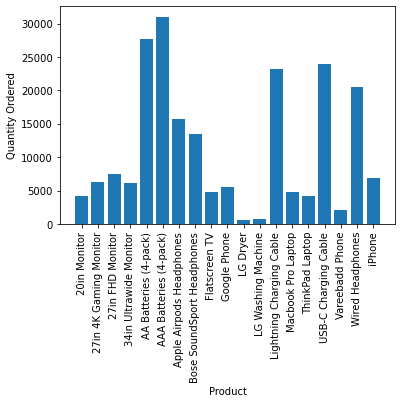

In [54]:
# visualization
quantity_ordered = df.groupby('Product').sum()['Quantity Ordered']
products = df.groupby('Product').sum().index

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

<ipython-input-55-0a5be59ab231>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


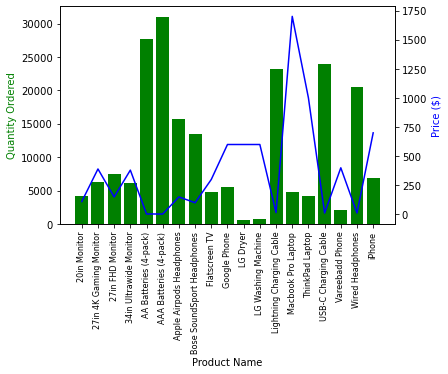

In [55]:
# visualize a bar chart with the correlation between price and quantity ordered 
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#### Answer:
We can immediately answer: AAA Batteries (4-pack) were sold the most in 2019.
By observing the line chart of price and the bar chart of the quantity ordered, the correlation between them is that whenever the price of that product was low, its quantity ordered was high and vice versa. Therefore, that could be the most important reason why AAA Batteries (4-pack) were sold the most.